In [60]:
!pip install numpy
!pip install pandas
!pip install pandas-datareader
!pip install plotly
!pip install yfinance

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
ERROR: unknown command "instal" - maybe you meant "install"


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [31]:
start='2010-01-01'
end='2023-12-31'

df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [32]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848206,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [34]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [36]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


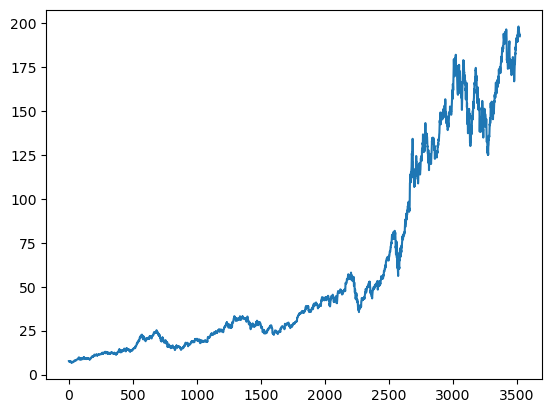

In [38]:
plt.plot(df.Close)

In [39]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [40]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

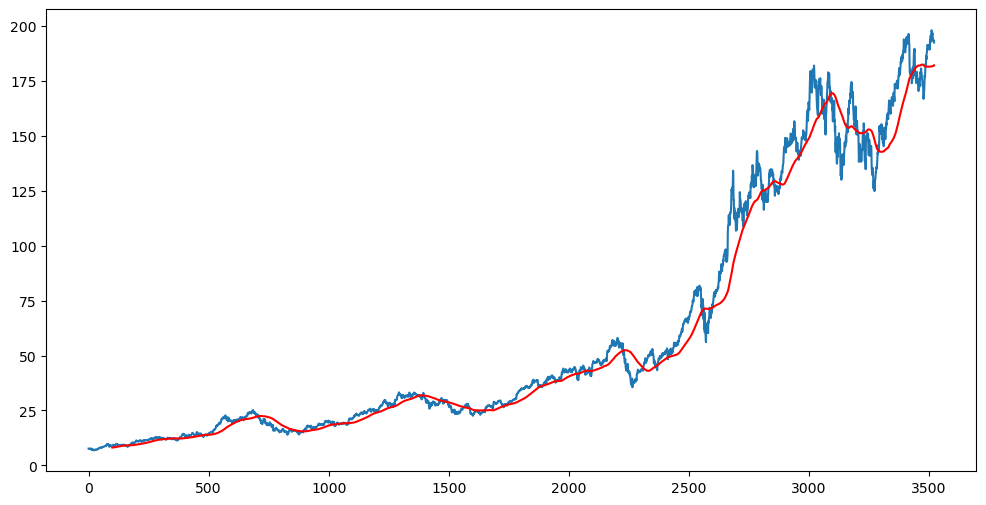

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [43]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

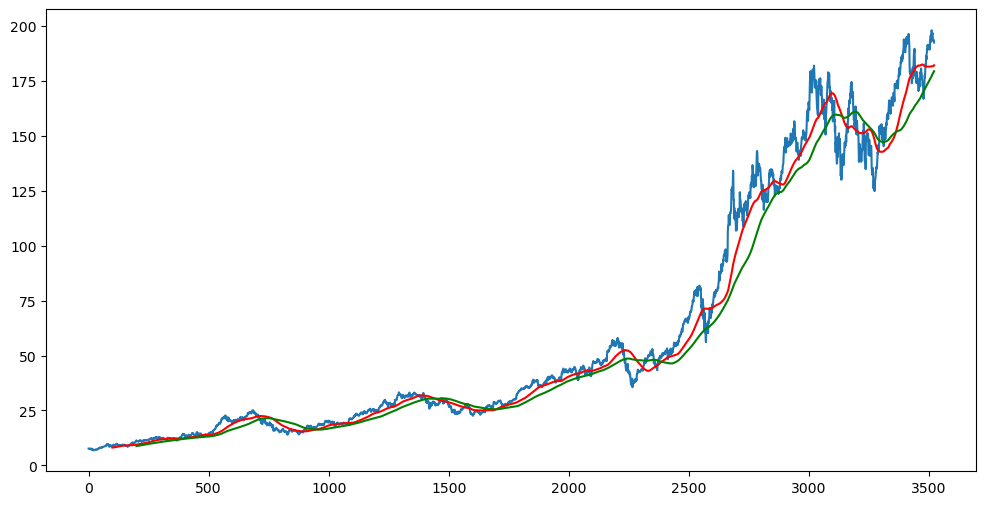

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [45]:
df.shape

(3522, 5)

In [48]:
tr=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
tst=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
tst.shape


(1057, 1)

In [50]:
tr.shape


(2465, 1)

In [51]:
tr.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [52]:
tst.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [53]:
from sklearn.preprocessing import MinMaxScaler


In [54]:
scaler=MinMaxScaler(feature_range=(0,1))
tr_a=scaler.fit_transform(tr)
tr_a

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [55]:
xtrain=[]
ytrain=[]

for i in range(100,tr_a.shape[0]):
    xtrain.append(tr_a[i-100:i])
    ytrain.append(tr_a[i,0])

xtrain,ytrain = np.array(xtrain), np.array(ytrain)

In [56]:
xtrain.shape


(2365, 100, 1)

In [62]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 3.5 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.5 MB/s eta 0:00:0000:0100:01


In [63]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [67]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences = True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - loss: 0.0668
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.0066
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - loss: 0.0050
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.0058
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - loss: 0.0047
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - loss: 0.0048
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0038
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.0040
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0042
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - loss: 0.0035
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step - loss: 0.0032
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - loss: 0.0034
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.0038
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - loss: 0.0029
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [71]:
model.save('keras_model.h5')

In [74]:
past=tr.tail(100)
past

,Close
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [75]:
finaldf=pd.concat([past,tst],ignore_index=True)

In [76]:
finaldf

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000
...,...
1152,193.600006
1153,193.050003
1154,193.149994
1155,193.580002


In [80]:
inpt=scaler.fit_transform(finaldf)
inpt

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [81]:
inpt.shape

(1157, 1)

In [84]:
xtest=[]
ytest=[]

for i in range(100,inpt.shape[0]):
    xtest.append(inpt[i-100:i])
    ytest.append(inpt[i,0])

xtest,ytest = np.array(xtest), np.array(ytest)


In [85]:
print(xtest.shape)
print(ytest.shape)

(1057, 100, 1)
(1057,)


In [86]:
#making prediction

y_predict = model.predict(xtest)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


In [87]:
y_predict.shape

(1057, 1)

In [88]:
ytest

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [90]:
y_predict

array([[0.16699615],
       [0.16782215],
       [0.16869609],
       ...,
       [0.8605506 ],
       [0.85701776],
       [0.85316676]], dtype=float32)

In [91]:
scaler.scale_

array([0.00646057])

In [93]:
sf=1/0.00646057
y_predict = y_predict*sf
ytest = ytest*sf

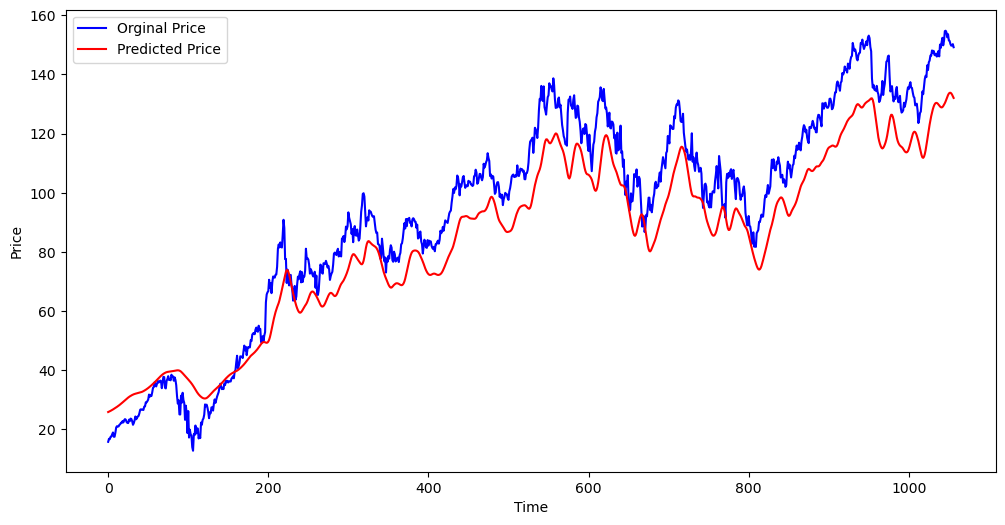

In [94]:
plt.figure(figsize = (12,6))
plt.plot(ytest,'b',label='Orginal Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()